In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from matplotlib import cm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.base import clone
from scipy.stats import mode

from sklearn.tree import DecisionTreeClassifier

## Dataset

-  Let's create a two-dimensional data, which has 4 class labels.

In [43]:
X, y = make_blobs(n_samples=1000, centers=4,
                  random_state=0, cluster_std=1.0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Text(0,0.5,'$X_2$')

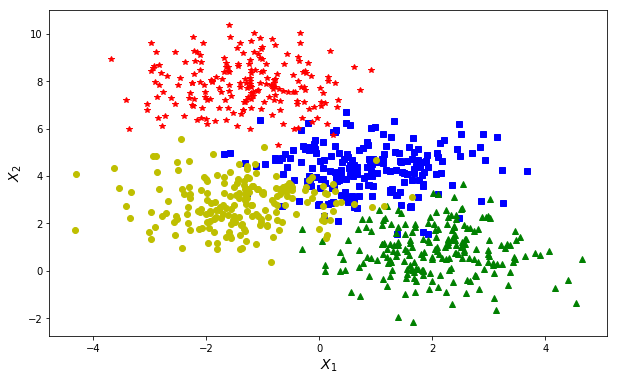

In [45]:
plt.figure(figsize = (10, 6))
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'bs', linewidth = 2)
plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'g^', linewidth = 2)
plt.plot(X_train[:, 0][y_train == 2], X_train[:, 1][y_train == 2], 'yo', linewidth = 2)
plt.plot(X_train[:, 0][y_train == 3], X_train[:, 1][y_train == 3], 'r*', linewidth = 2)
plt.xlabel('$X_1$', fontsize = 14)
plt.ylabel('$X_2$', fontsize = 14)

## Decision Tree

In [46]:
tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Now let's plot the deicision boundary and see how well the classifer has fitted our dataset.

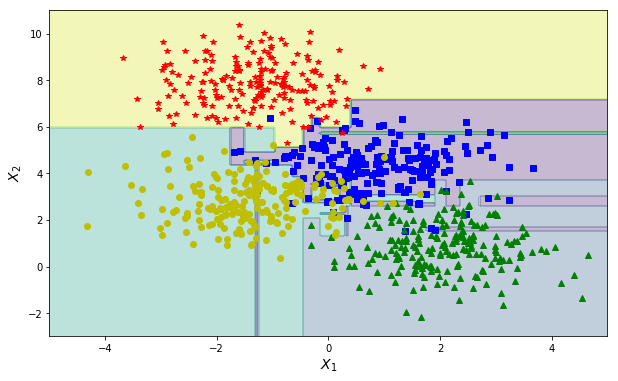

In [47]:
def plot_decision_boundary(clf, X, y, axes = [-5.0, 5.0, -3.0, 11.0]):
    x1s = np.linspace(axes[0], axes[1], 200)
    x2s = np.linspace(axes[2], axes[3], 200)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    #custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0', '#ff4500'])
    plt.contourf(x1, x2, y_pred, cmap = plt.get_cmap(), alpha = 0.3)
    
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bs', linewidth = 2)
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g^', linewidth = 2)
    plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], 'yo', linewidth = 2)
    plt.plot(X[:, 0][y == 3], X[:, 1][y == 3], 'r*', linewidth = 2)
    plt.xlabel('$X_1$', fontsize = 14)
    plt.ylabel('$X_2$', fontsize = 14)
    
plt.figure(figsize = (10, 6))
plot_decision_boundary(tree_clf, X_train, y_train)

In [48]:
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

Looking at the model we can see that it is overfitting our dataset. Let's try to tweak some hyperparameters.

In [50]:
param_grid = {
    'max_leaf_nodes': list(range(2, 100)),
    'min_samples_split': [2, 3, 4, 5]
}

gridsearch_cv = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = param_grid, n_jobs = -1, 
                            verbose = 2, cv = 3)
gridsearch_cv.fit(X_train, y_train)

Fitting 3 folds for each of 392 candidates, totalling 1176 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1176 out of 1176 | elapsed:    4.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
     

In [51]:
gridsearch_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [52]:
gridsearch_cv.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

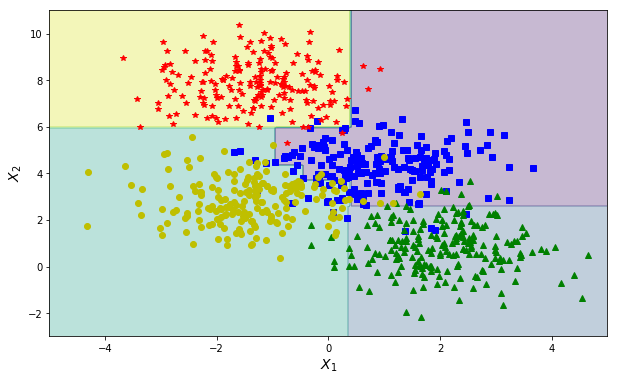

In [54]:
plt.figure(figsize = (10, 6))
plot_decision_boundary(gridsearch_cv.best_estimator_, X_train, y_train)

In [55]:
y_pred = gridsearch_cv.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.88

## Creating Forest

In [63]:
n_trees = 100
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits = n_trees, test_size = len(X_train) - n_instances, random_state = 42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [64]:
forest = [clone(gridsearch_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(accuracy_scores)

0.878

The accuracy would definitely be less than the previous classifier as we are training on a small data of just 100 instances. But now what we do is we generate predictions for each test set instance and keep only the most frequent prediction.

In [67]:
Y_pred = np.empty([n_trees, len(X_test)], dtype = np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [68]:
Y_pred_most_frequent, n_votes = mode(Y_pred, axis = 0)

In [69]:
Y_pred_most_frequent

array([[0, 0, 0, 3, 0, 1, 1, 3, 1, 2, 0, 3, 3, 1, 2, 0, 0, 3, 1, 3, 2, 2,
        1, 1, 0, 1, 2, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 2, 3, 3, 2, 3, 2,
        3, 3, 0, 3, 3, 2, 2, 0, 3, 1, 1, 1, 1, 3, 0, 3, 3, 3, 1, 0, 1, 2,
        3, 2, 3, 1, 3, 2, 0, 0, 0, 3, 2, 2, 0, 0, 3, 0, 3, 2, 0, 2, 3, 0,
        1, 1, 2, 3, 0, 1, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 3, 0, 0, 0,
        0, 2, 3, 0, 2, 2, 0, 2, 2, 3, 0, 0, 3, 1, 1, 2, 0, 1, 0, 3, 2, 2,
        2, 3, 1, 1, 1, 0, 2, 3, 3, 3, 1, 3, 3, 1, 2, 3, 2, 3, 2, 1, 2, 0,
        1, 2, 0, 1, 2, 1, 0, 2, 0, 3, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 3,
        2, 3, 3, 0, 2, 2, 0, 2, 1, 0, 3, 2, 0, 2, 2, 2, 3, 2, 3, 2, 3, 3,
        0, 2]], dtype=uint8)

In [71]:
accuracy_score(y_test, Y_pred_most_frequent.reshape([-1]))

0.92